<a href="https://colab.research.google.com/github/taibgoulart/on29-python-s11-projeto-guiado-II/blob/main/exercicios/para-casa/2_analises_e_graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
micro_dados_enem = pd.read_csv('MICRODADOS_ENEM_2018.csv', sep=';', encoding='ISO-8859-1')

In [3]:
micro_dados_enem.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180007186625,2018,2,F,0.0,4,1,2,0,4,...,B,C,B,B,D,B,C,B,B,D
1,180007186627,2018,3,F,0.0,4,1,1,1,1,...,A,B,A,A,B,A,A,A,A,A
2,180007186628,2018,3,M,0.0,0,1,2,0,2,...,A,B,B,A,D,A,A,A,B,A
3,180007186629,2018,2,F,0.0,3,1,2,0,4,...,A,C,A,B,D,B,A,B,B,B
4,180007186631,2018,11,F,0.0,5,1,1,6,1,...,A,B,B,A,C,A,B,A,A,A


In [4]:
micro_dados_enem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [5]:
colunas_selecionadas = ['NU_INSCRICAO','TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC','Q006', 'Q025', 'Q027']

In [6]:
micro_dados_selecionados = micro_dados_enem.filter(items=colunas_selecionadas)

In [7]:
micro_dados_selecionados

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,Q006,Q025,Q027
0,180007186625,2,F,0.0,4,1,2,0,4,1.0,0,1500800.0,Ananindeua,15.0,PA,4.0,1.0,F,B,D
1,180007186627,3,F,0.0,4,1,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,B,A,A
2,180007186628,3,M,0.0,0,1,2,0,2,1.0,0,3155603.0,Rio Pardo de Minas,31.0,MG,2.0,1.0,B,A,A
3,180007186629,2,F,0.0,3,1,2,0,4,1.0,0,1500800.0,Ananindeua,15.0,PA,4.0,1.0,I,B,B
4,180007186631,11,F,0.0,5,1,1,6,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,C,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23761,180007213754,14,F,0.0,3,1,1,12,1,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,C,B,B
23762,180007213755,2,F,0.0,3,1,2,0,2,1.0,0,3550308.0,Sï¿½o Paulo,35.0,SP,2.0,1.0,C,B,A
23763,180007213756,17,M,1.0,1,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,B,A,A
23764,180007213757,11,F,0.0,2,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A


1º Análise

Qual a quantidade de Inscritos por Estado?

Trabalhando com Colunas Específicas
Para descobrir quais os Estados das Escolas que os candidatos do Enem 2018 estudaram.
Uitlizei a função dropna(), para retirar as linhas com informações que continham dado NaN, haviam muitos na base de dados.
Depois utilizei o método value_counts() para descobrir quantas linhas haviam para cada município.
Utilizei taambém o sort_index() para ordenar o resultado e facilitar na hora de procurar

In [8]:
uf_escola = micro_dados_selecionados['SG_UF_ESC'].dropna()
contagem_uf = uf_escola.value_counts()

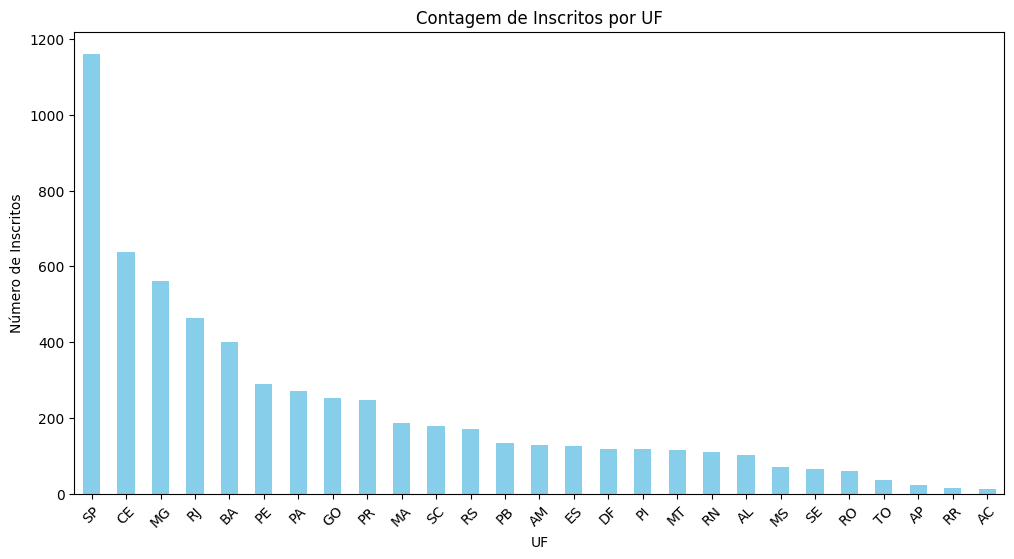

In [9]:
plt.figure(figsize=(12, 6)) # plt.figure() cria uma figura, de forma que podemos adicionar subfiguras nela
contagem_uf.plot(kind='bar', color='skyblue')
plt.title('Contagem de Inscritos por UF')
plt.xlabel('UF')
plt.ylabel('Número de Inscritos')
plt.xticks(rotation=45) # xticks() que é o elemento que controla as propriedades do eixo x
plt.show()

2º Análise

Qual o município teve mais inscrição?

Para descobrir quais os municípios das Escolas que os candidatos do Enem 2023 estudaram, o processo é mesmo dos estados

In [10]:
municipio_escolar = micro_dados_selecionados['NO_MUNICIPIO_ESC'].dropna()
contagem_municipio = municipio_escolar.value_counts().sort_index().head(20) # exibindo os 20 principais municípios

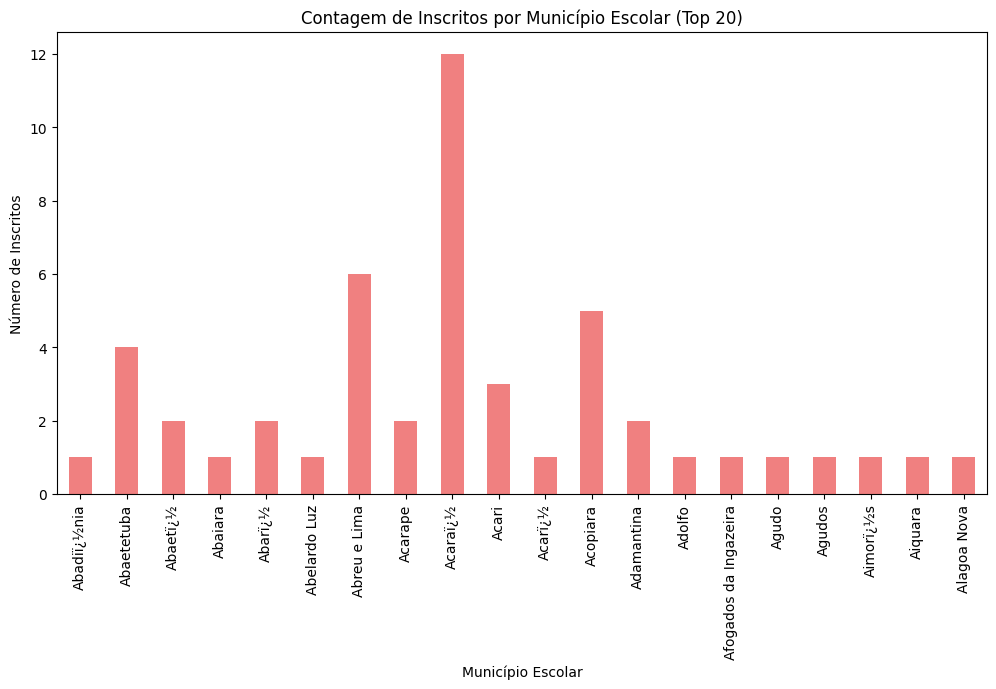

In [11]:
plt.figure(figsize=(12, 6))
contagem_municipio.plot(kind='bar', color='lightcoral')
plt.title('Contagem de Inscritos por Município Escolar (Top 20)')
plt.xlabel('Município Escolar')
plt.ylabel('Número de Inscritos')
plt.xticks(rotation=90)
plt.show()

3º Análise

Qual o maior grupo de Faixa Etária nos inscritos no Enem de 2018?

Trabalhando apenas com a coluna idade
Repetindo o processo de pegar o dataframe, separar a coluna e fazer a distribuição com value_counts()
Aqui não ordenei, pois queria realmente saber qual a faixa etária que mais apareceu nas inscrições do Enem de 2018

In [22]:
faixa_etaria_labels = {
    1: 'Menor de 17 anos',
    2: '17 anos',
    3: '18 anos',
    4: '19 anos',
    5: '20 anos',
    10: '25 anos',

}

# substitui os valores numéricos pelas descrições
faixa_etaria = micro_dados_selecionados['TP_FAIXA_ETARIA']
faixa_etaria_desc = faixa_etaria.map(faixa_etaria_labels)

# contagem de inscritos por Faixa Etária
contagem_faixa_etaria_desc = faixa_etaria_desc.value_counts().sort_index()

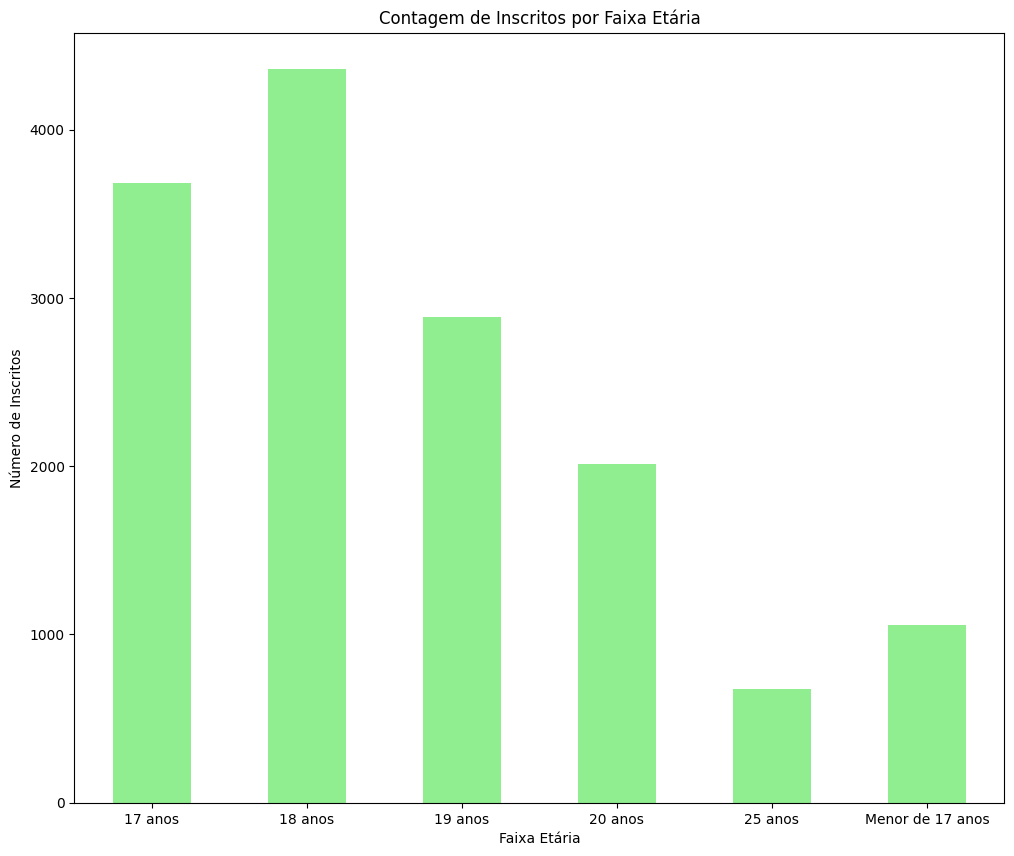

In [23]:
plt.figure(figsize=(12, 10))
contagem_faixa_etaria_desc.plot(kind='bar', color='lightgreen')
plt.title('Contagem de Inscritos por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Inscritos')
plt.xticks(rotation=0)
plt.show()

4º Análise

Qual a taxa de Conlusão de Ensino médio para os candidatos de 2018?
1 - Já Concluiu
2 - Estava cursando e iria terminar em 2018
3 - Estava cursando e iria concluir após 2018
4 - Não havia concluído e não estava cursando

In [24]:
conclusao_labels = {
    1: 'Já Concluiu',
    2: 'Estava cursando e iria terminar em 2018',
    3: 'Estava cursando e iria concluir após 2018',
    4: 'Não havia concluído e não estava cursando'

}

In [25]:
ensino_medio = micro_dados_selecionados['TP_ST_CONCLUSAO']
conclusao_desc = ensino_medio.map(conclusao_labels)

In [26]:
conclusao_em_desc = conclusao_desc.value_counts()
taxa_conclusao_desc = [100 * x / conclusao_em_desc.sum() for x in conclusao_em_desc]

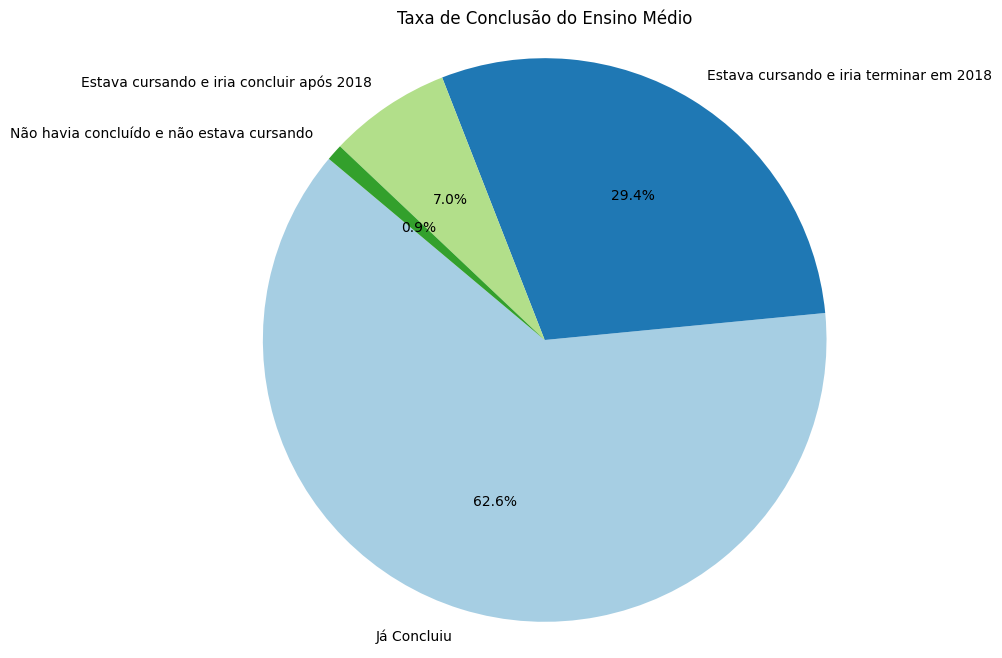

In [27]:
plt.figure(figsize=(8, 8))
plt.pie(taxa_conclusao_desc, labels=conclusao_em_desc.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(np.arange(len(taxa_conclusao_desc))))
plt.title('Taxa de Conclusão do Ensino Médio')
plt.axis('equal')  # assegura que o gráfico de pizza seja desenhado como um círculo
plt.show()